# EXERCÍCIO

Agora que você aprendeu os principais tipos de distribuições, o objetivo é utilizar a base de dados do censo para identificar as distribuições para cada um dos atributos. Para isso, carregue o arquivo `census.csv` e gere o histograma para cada atributo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CSVs/census.csv')

In [3]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
cols = df.dtypes.index[df.dtypes== 'int64']
cols

Index(['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loos',
       'hour-per-week'],
      dtype='object')

In [5]:
def get_counts(df, col):
    return df[col].replace(list(df[col].unique()), list(range(0, len(df[col].unique()))))

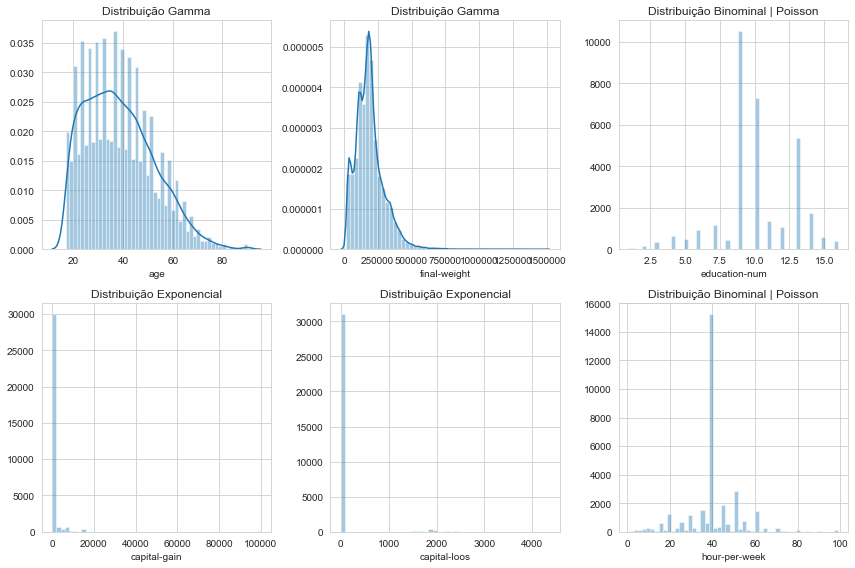

In [6]:
l, c = 0, 0
sns.set_style('whitegrid')
_, ax = plt.subplots(2, 3, figsize=(12,8))
dist_type = ['Gamma','Gamma','Binominal | Poisson','Exponencial','Exponencial','Binominal | Poisson']
for i, col in enumerate(cols):
    kde = True if col in ['age', 'final-weight'] else False
    
    sns.distplot(df[col], ax=ax[l][c], kde=kde)
    ax[l][c].set(title=f'Distribuição {dist_type[i]}')
    if c == 2:
        l += 1
        c = 0
    else:
        c +=1

plt.tight_layout()
plt.show()

In [7]:
cols = df.dtypes[df.dtypes == 'object'].index
cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

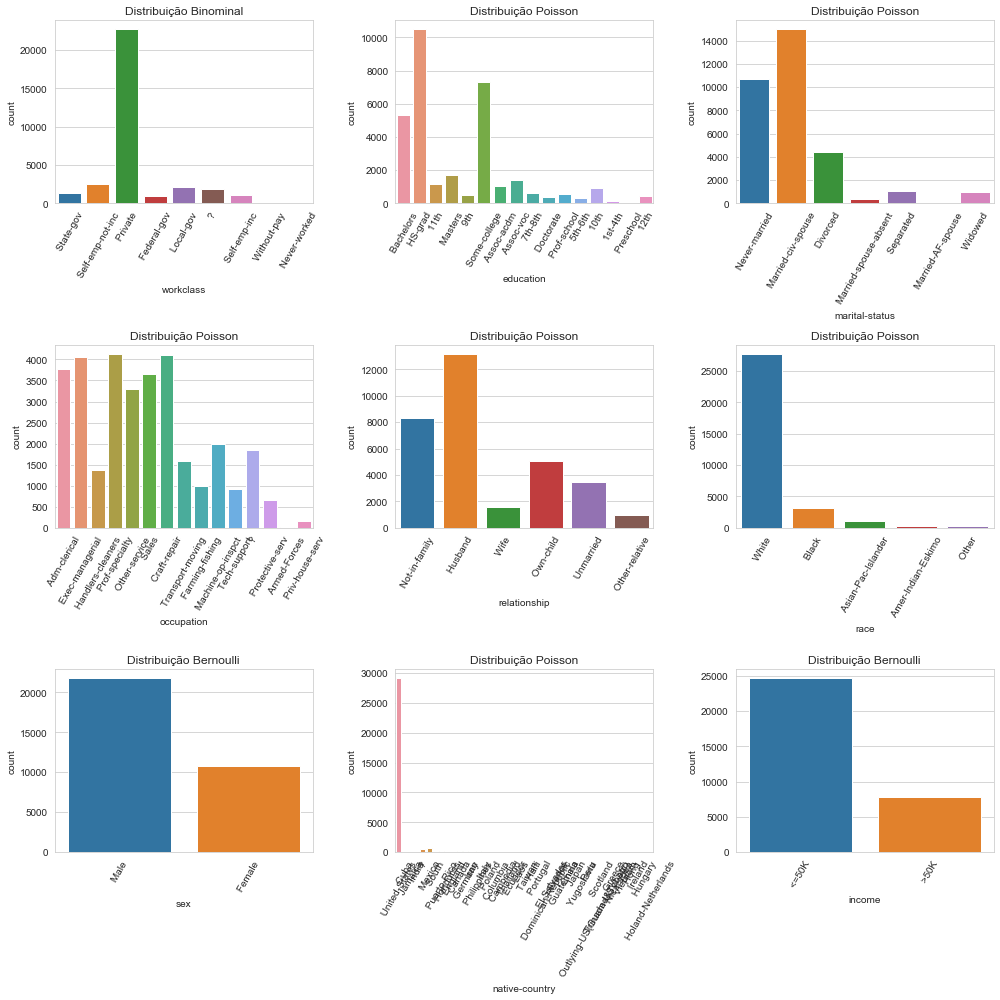

In [8]:
l, c = 0, 0
sns.set_style('whitegrid')
_, ax = plt.subplots(3, 3, figsize=(14,14))
dist_type = ['Binominal','Poisson','Poisson','Poisson','Poisson','Poisson','Bernoulli','Poisson','Bernoulli']
for i, col in enumerate(cols):
    
    sns.countplot(df[col], ax=ax[l][c])
    ax[l][c].set(title=f'Distribuição {dist_type[i]}')
    ax[l][c].set_xticklabels(ax[l][c].get_xticklabels(), rotation=60)
    if c == 2:
        l += 1
        c = 0
    else:
        c +=1

plt.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('CSVs/credit_data.csv')
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


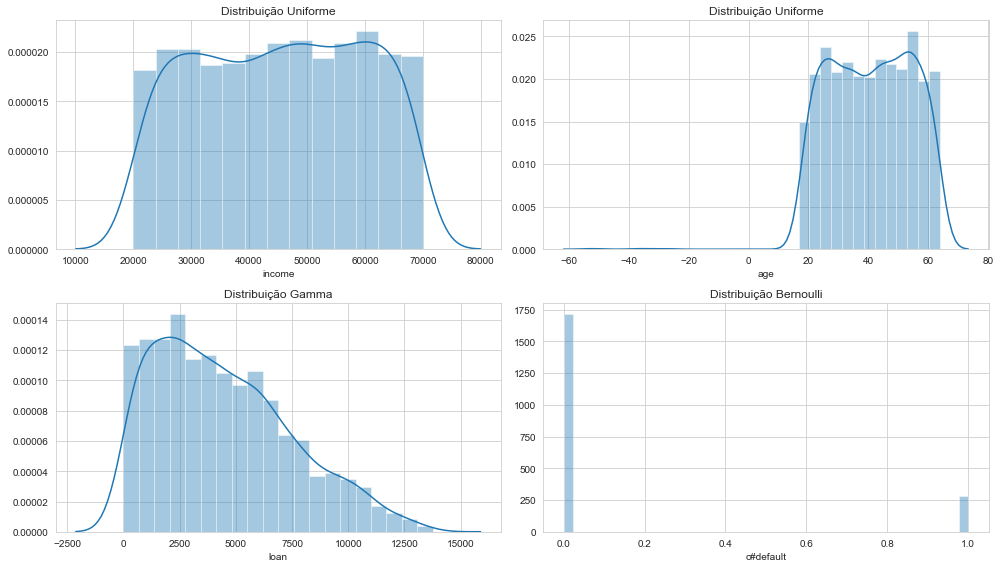

In [14]:
l, c = 0, 0
sns.set_style('whitegrid')
_, ax = plt.subplots(2, 2, figsize=(14,8))
dist_type = ['Uniforme','Uniforme','Gamma','Bernoulli']
for i, col in enumerate(df.columns[1:]):
    kde = True if col != 'c#default' else False
    sns.distplot(df[col], ax=ax[l][c], kde = kde)
    ax[l][c].set(title=f'Distribuição {dist_type[i]}')
    if c == 1:
        l += 1
        c = 0
    else:
        c +=1

plt.tight_layout()
plt.show()